In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib import colors
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator, DataGenerator as dg
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors

iris_klastering = pd.read_csv('D:\\\\BelajarML\\\\praktikkum\\\\pertemuan3\\\\iris.csv', on_bad_lines='skip')
x = iris_klastering.iloc[:, [4]].values
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
x

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [3]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_klastering[iris_klastering.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
iris_klastering = iris_klastering.drop_duplicates()
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
print(iris_klastering.columns)
iris_klastering

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
labels_species = iris_klastering['Species']
labels_species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [8]:
le = LabelEncoder()
labels_species = le.fit_transform(labels_species)
labels_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris_df = iris_klastering

# Menghapus kolom Spesies

In [10]:
iris_klastering = iris_klastering.drop(columns=['Species'])

In [11]:
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_klastering.isnull().sum()

SepalLength    0
SepalWidth     2
PetalLength    2
PetalWidth     0
dtype: int64

In [13]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
iris_klastering.describe()

,SepalWidth,PetalLength,PetalWidth
count,145.000000,145.000000,147.000000
mean,3.055862,3.788276,1.208844
std,0.439993,1.757188,0.757874
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.400000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


# Membersihkan data yang NaN

In [15]:
iris_klastering['SepalLength'] = pd.to_numeric(iris_klastering['SepalLength'], errors='coerce')
iris_klastering = iris_klastering.dropna()
clean_iris_df = iris_klastering
clean_iris_df[clean_iris_df.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth


# Features Scaling with Min Max Scaler 

In [16]:
from sklearn.preprocessing import StandardScaler

mms = StandardScaler()
clean_iris_df = mms.fit_transform(clean_iris_df)
clean_iris_df = pd.DataFrame(clean_iris_df, columns=iris_klastering.columns)
clean_iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.942789,1.000472,-1.380149,-1.359383
1,-1.184661,-0.143385,-1.380149,-1.359383
2,-1.426532,0.314158,-1.437319,-1.359383
3,-1.547468,0.085387,-1.322978,-1.359383
4,-1.063725,1.229244,-1.380149,-1.359383
...,...,...,...,...
137,0.992185,-0.143385,0.792337,1.424738
138,0.508442,-1.287242,0.677996,0.894429
139,0.750313,-0.143385,0.792337,1.027006
140,0.387506,0.771701,0.906679,1.424738


# Menentukan Nilai K dengan Elbow Method

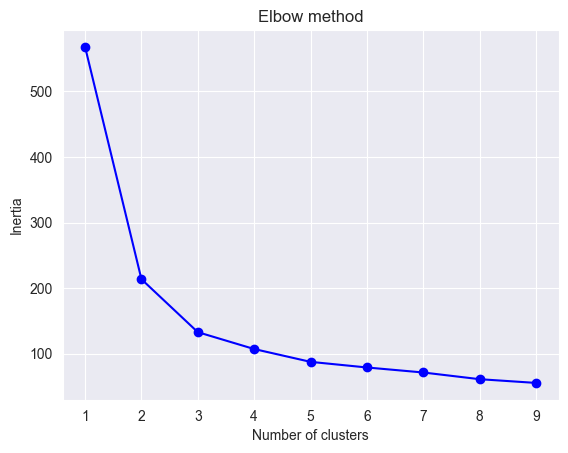

In [17]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(clean_iris_df)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.title('Elbow method')
plt.plot(range(1, 10), inertia, marker='o', c="blue")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [18]:
elbow_data = pd.DataFrame({"Inersia ": inertia, "Clusters": range(1, 10)})
elbow_data

,Inersia,Clusters
0,568.000000,1
1,213.543023,2
2,132.730152,3
3,106.984557,4
4,87.411198,5
5,78.842504,6
6,71.177108,7
7,60.961969,8
8,55.266892,9


# Membuat Bar plot untuk memvisualisasikan hasil optimal dengan Elbow 

<Axes: >

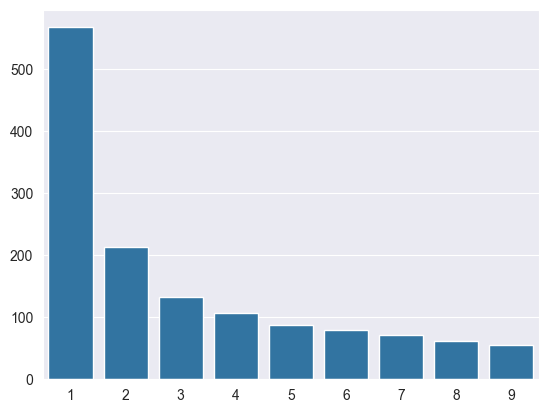

In [19]:
sns.barplot(elbow_data, x=range(1, 10), y=inertia)

# Menentukan Nilai K dengan Silhouette Method

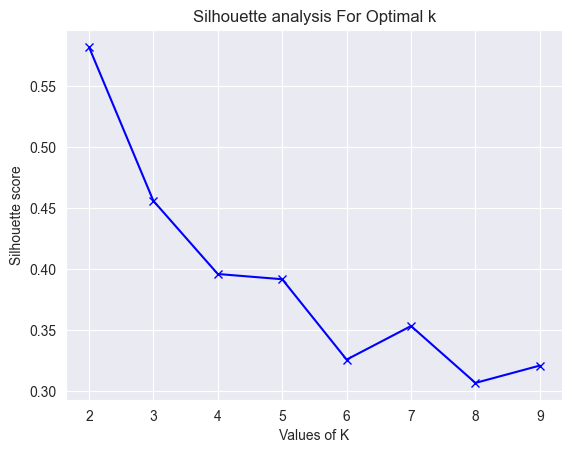

In [20]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range(2, 10):
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(clean_iris_df)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(clean_iris_df, cluster_labels))

plt.plot(range(2, 10), silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [21]:
silhouette_data = pd.DataFrame({'K': range_n_clusters, 'Silhouette Score': silhouette_avg})
silhouette_data

,K,Silhouette Score
0,2,0.582168
1,3,0.455864
2,4,0.395835
3,5,0.391537
4,6,0.325582
5,7,0.353136
6,8,0.306452
7,9,0.320699


In [22]:
silhouette_scores = silhouette_score(clean_iris_df, kmeans.labels_)
print(silhouette_scores)

0.3206990308620845


<Axes: xlabel='K', ylabel='Silhouette Score'>

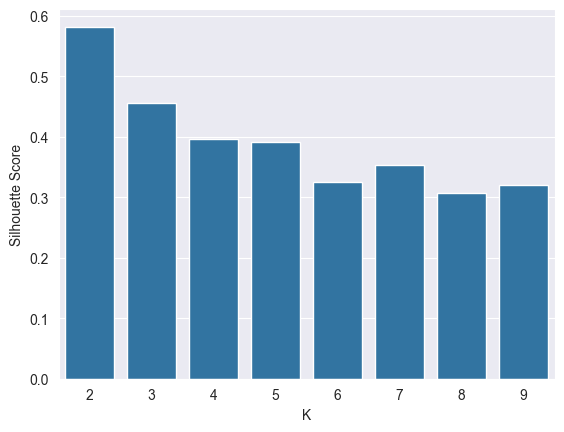

In [23]:
sns.barplot(silhouette_data, x='K', y='Silhouette Score')

# Nilai Silhouette Score tanpa Label

In [24]:
silhouette_scores

0.3206990308620845

In [25]:
inertia

[568.0,
 213.54302310095153,
 132.73015233455288,
 106.98455701416565,
 87.4111975043883,
 78.84250366702969,
 71.17710784180255,
 60.96196875315411,
 55.26689189063205]

In [26]:
print(kmeans.cluster_centers_)

[[ 0.46080031 -0.14338492  0.49782169  0.38822536]
 [-0.6171923   1.93315583 -1.30978461 -1.24720222]
 [-0.49359848 -1.22187884  0.03006158 -0.05886391]
 [-1.54746834 -0.10525634 -1.39444119 -1.38147911]
 [ 2.20154411 -0.82969923  1.70706819  1.22587209]
 [ 1.09296516  0.4920913   1.06548611  1.38054546]
 [ 0.33459638 -1.01557602  0.73516663  0.78671018]
 [ 1.78690679 -0.17606655  1.31504067  0.95124793]
 [-1.00930365  0.84033227 -1.34298758 -1.26657888]]


# Inisialisasi K-Means

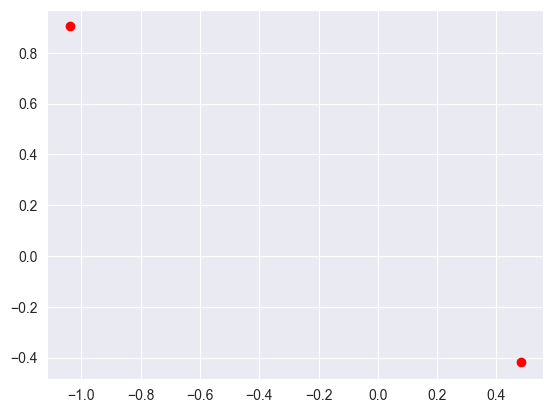

In [27]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(clean_iris_df)
y_kmeans = kmeans.fit_predict(clean_iris_df)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red")
plt.show()

# Feature Labels

In [28]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Menentukan titik centroid pada kmeans

In [29]:
print("List of Centroids")
kmeans.cluster_centers_

List of Centroids


array([[ 0.48225972, -0.41932572,  0.62495099,  0.59920573],
       [-1.03953762,  0.90387989, -1.34711658, -1.29162124]])

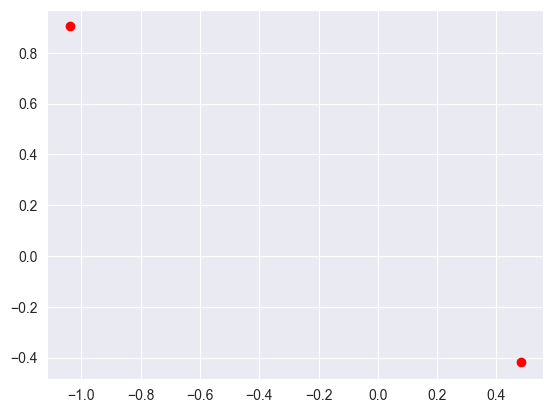

In [30]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", label="Centroids")

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Petal Length]

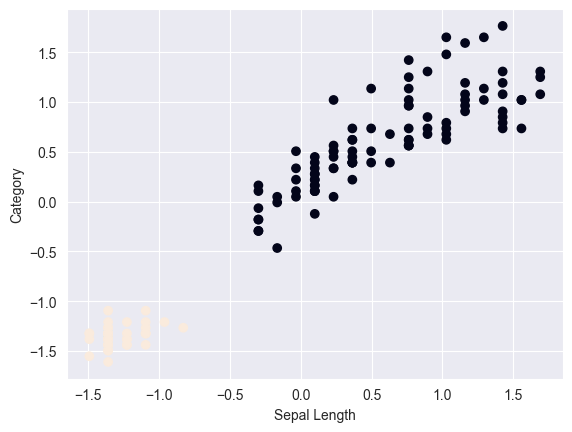

In [31]:
plt.scatter(clean_iris_df['PetalWidth'], clean_iris_df['PetalLength'], c=kmeans.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

In [32]:
print("Centroid untuk setiap Features")
print(clean_iris_df.columns)
kmeans.cluster_centers_

Centroid untuk setiap Features
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')


array([[ 0.48225972, -0.41932572,  0.62495099,  0.59920573],
       [-1.03953762,  0.90387989, -1.34711658, -1.29162124]])

# Korelasi setiap label

In [33]:
clean_iris_df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.112386,0.871020,0.814127
SepalWidth,-0.112386,1.000000,-0.427052,-0.364079
PetalLength,0.871020,-0.427052,1.000000,0.960888
PetalWidth,0.814127,-0.364079,0.960888,1.000000


<Axes: >

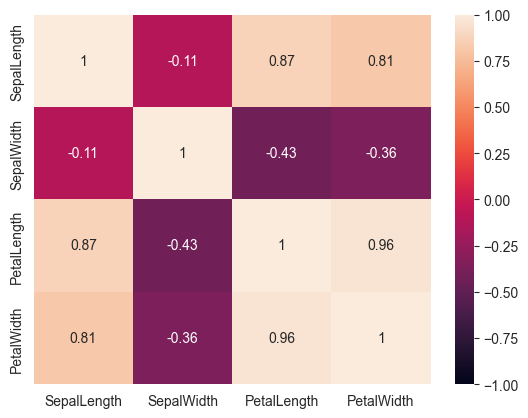

In [34]:
sns.heatmap(clean_iris_df.corr(), vmin=-1, vmax=1, annot=True)

# Mengambil semua baris matriks , dan ambil kolom ke 3 dan 2 untuk Petal Width dan Sepal Length

In [35]:
centroids_petalW = kmeans.cluster_centers_[:, 3]
centroids_sepalL = kmeans.cluster_centers_[:, 0]

# Mengambil klastering untuk atribut Petal Length dan Sepal Length

In [36]:
centroids_petalL = kmeans.cluster_centers_[:, 2]

# Visualisasikan hasil klastering ke dalam Scatter Plot dan Hist Plot [Petal Width , Sepal Length]

<Axes: xlabel='PetalWidth', ylabel='SepalLength'>

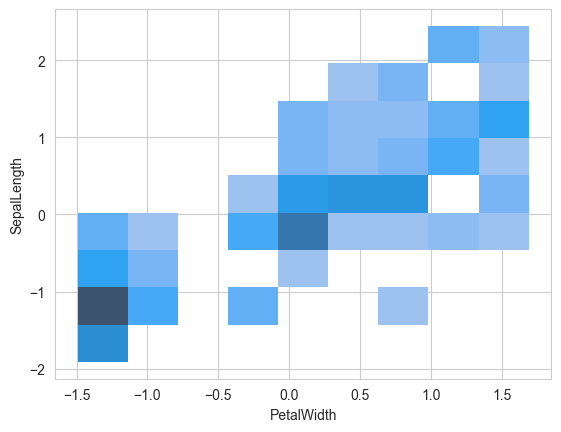

In [37]:
sns.set_style("whitegrid")
sns.histplot(x=clean_iris_df['PetalWidth'], y=clean_iris_df['SepalLength'])

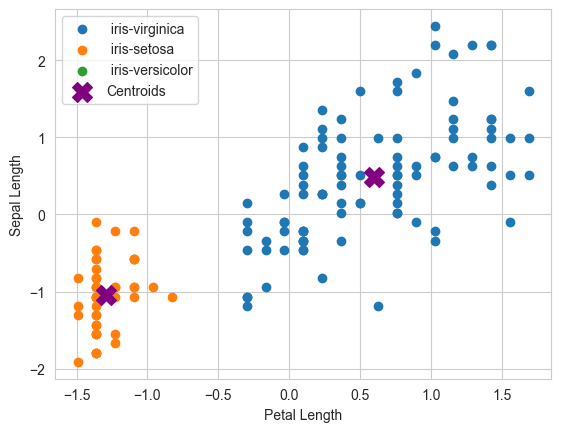

In [38]:
labels = {0: "iris-virginica", 1: "iris-setosa", 2: "iris-versicolor"}
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalWidth'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f' {cluster_label}')
plt.scatter(centroids_petalW, centroids_sepalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Length , Sepal Length]

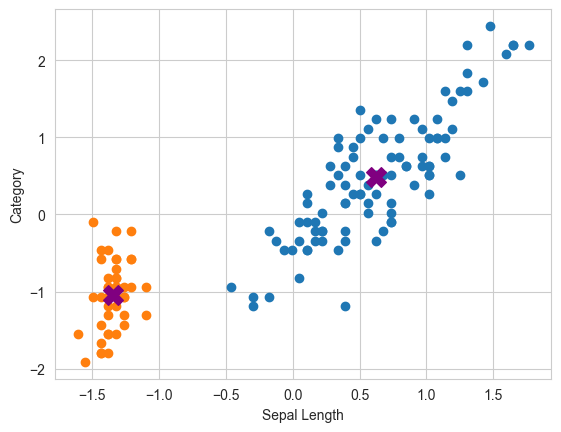

In [39]:
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalLength'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')
plt.scatter(centroids_petalL, centroids_sepalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

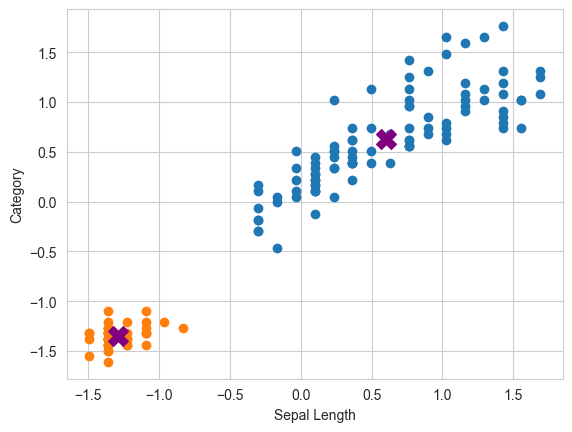

In [40]:
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalWidth'][kmeans.labels_ == label],
                clean_iris_df['PetalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')
plt.scatter(centroids_petalW, centroids_petalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

# Hierarchical Clustering

<Axes: xlabel='PetalLength', ylabel='Count'>

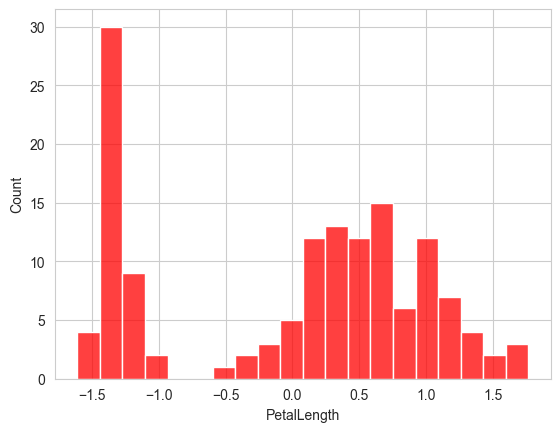

In [41]:
sns.histplot(clean_iris_df['PetalLength'], bins=20, color='red')

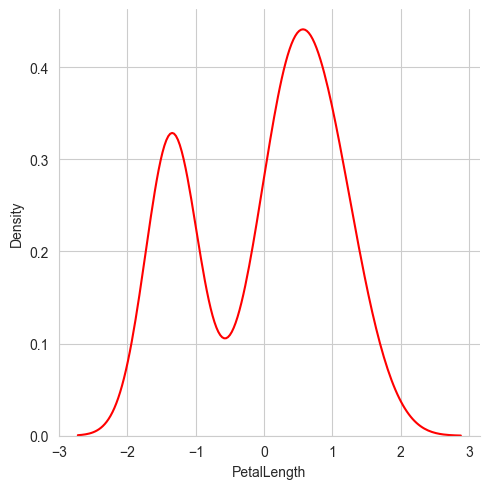

In [42]:
sns.displot(clean_iris_df['PetalLength'], kind='kde', color='red')

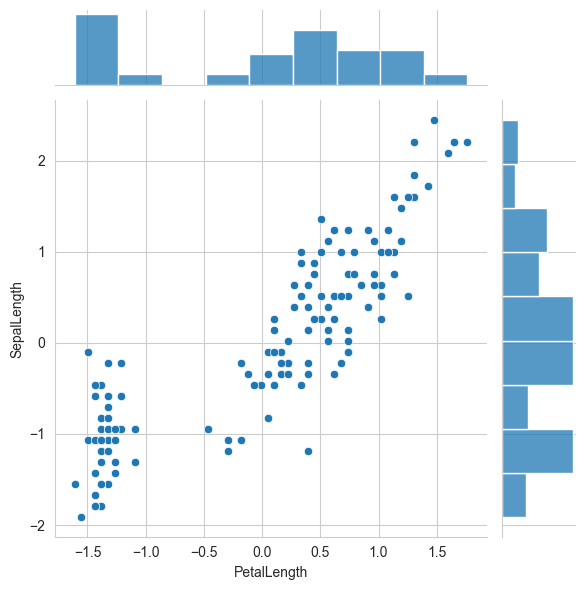

In [43]:
sns.jointplot(clean_iris_df, x='PetalLength', y='SepalLength')

In [44]:
clean_iris_df.shape

(142, 4)

In [45]:
clean_iris_df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
dtype: object

In [46]:
clusterIris = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusterIris = clusterIris.fit_predict(clean_iris_df)
print(clusterIris)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


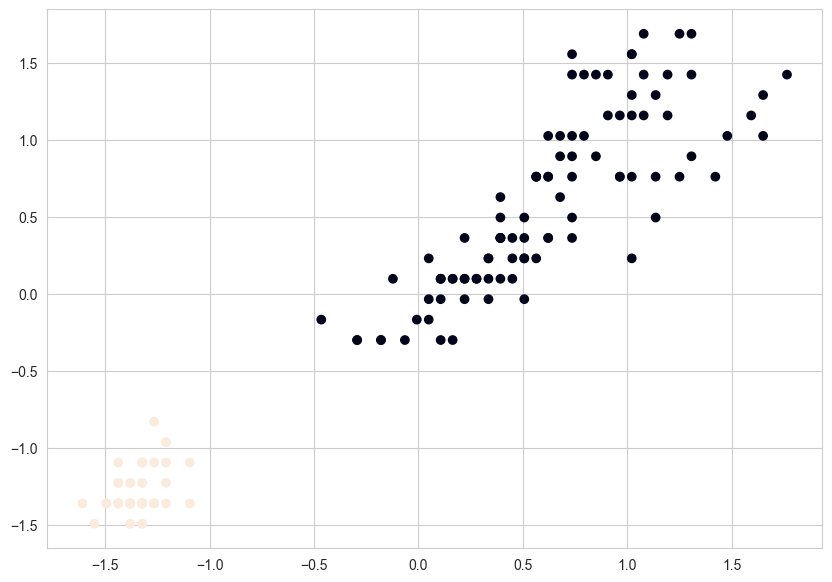

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(clean_iris_df['PetalLength'], clean_iris_df['PetalWidth'], c=kmeans.labels_)

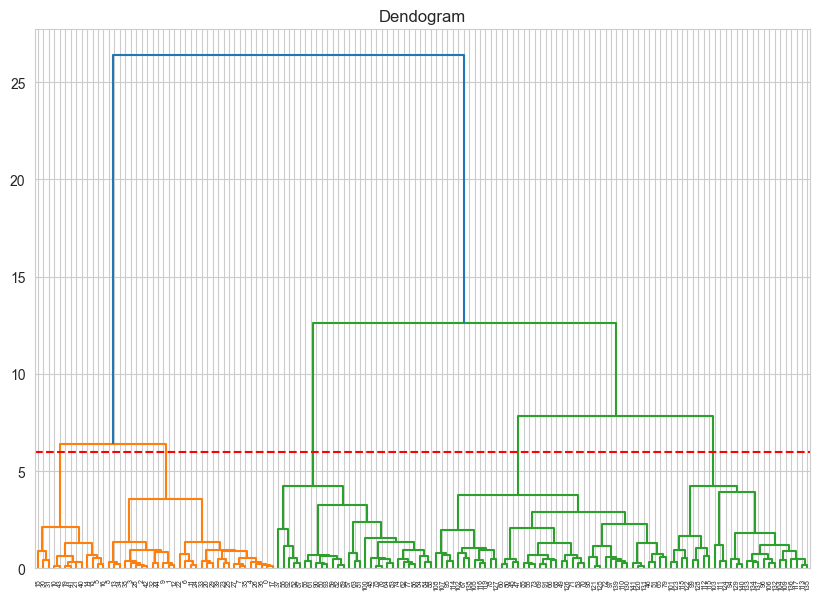

In [48]:
plt.figure(figsize=(10, 7))
plt.title('Dendogram')
dendogram = shc.dendrogram(shc.linkage(clean_iris_df, method='ward', metric='euclidean'))
plt.axhline(y=6, color='r', linestyle='--')

In [56]:
from sklearn.cluster import DBSCAN

#pakai knee locator
dbscan_opt = DBSCAN(eps=0.5, min_samples=3)
dbscan_opt = dbscan_opt.fit(clean_iris_df[['SepalLength', 'PetalWidth']])
dbscan_opt

DBSCAN(min_samples=3)

In [57]:
clean_iris_df['DBSCAN_opt_labels'] = dbscan_opt.labels_
clean_iris_df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 1    95
 0    45
-1     2
Name: count, dtype: int64

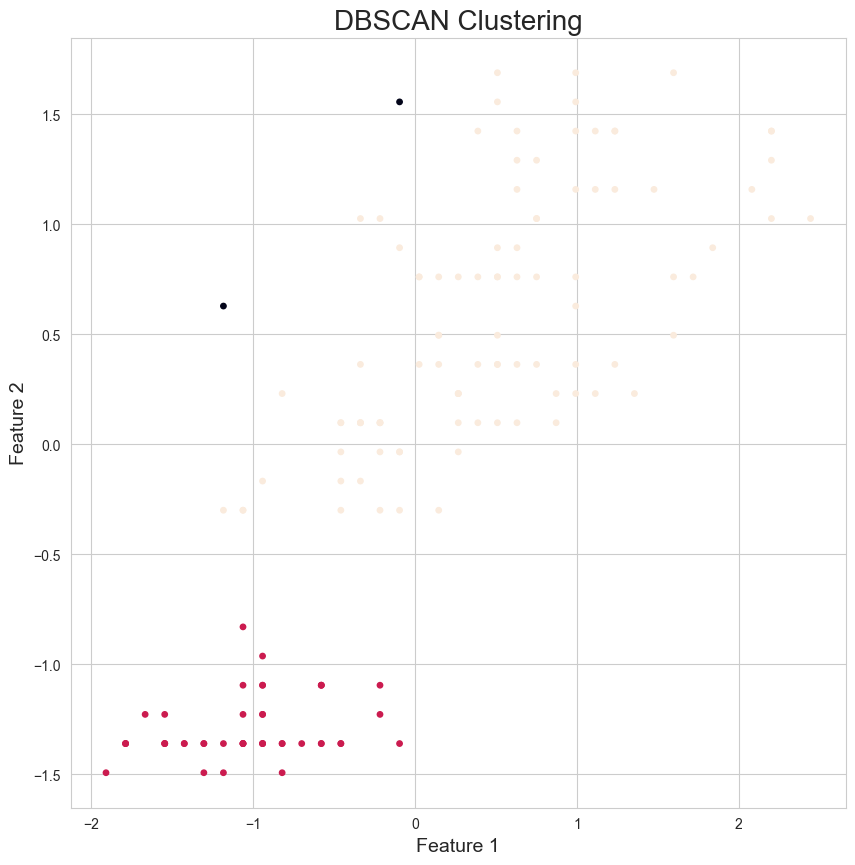

In [58]:
# Plotting the resulting clusters
plt.figure(figsize=(10, 10))
plt.scatter(clean_iris_df['SepalLength'], clean_iris_df['PetalWidth'], c=clean_iris_df['DBSCAN_opt_labels'], s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [61]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(clean_iris_df[['SepalLength', 'PetalWidth']])
distances, indices = nbrs.kneighbors(clean_iris_df[['SepalLength', 'PetalWidth']])

# The optimal value for epsilon will be found at the point of maximum curvature.

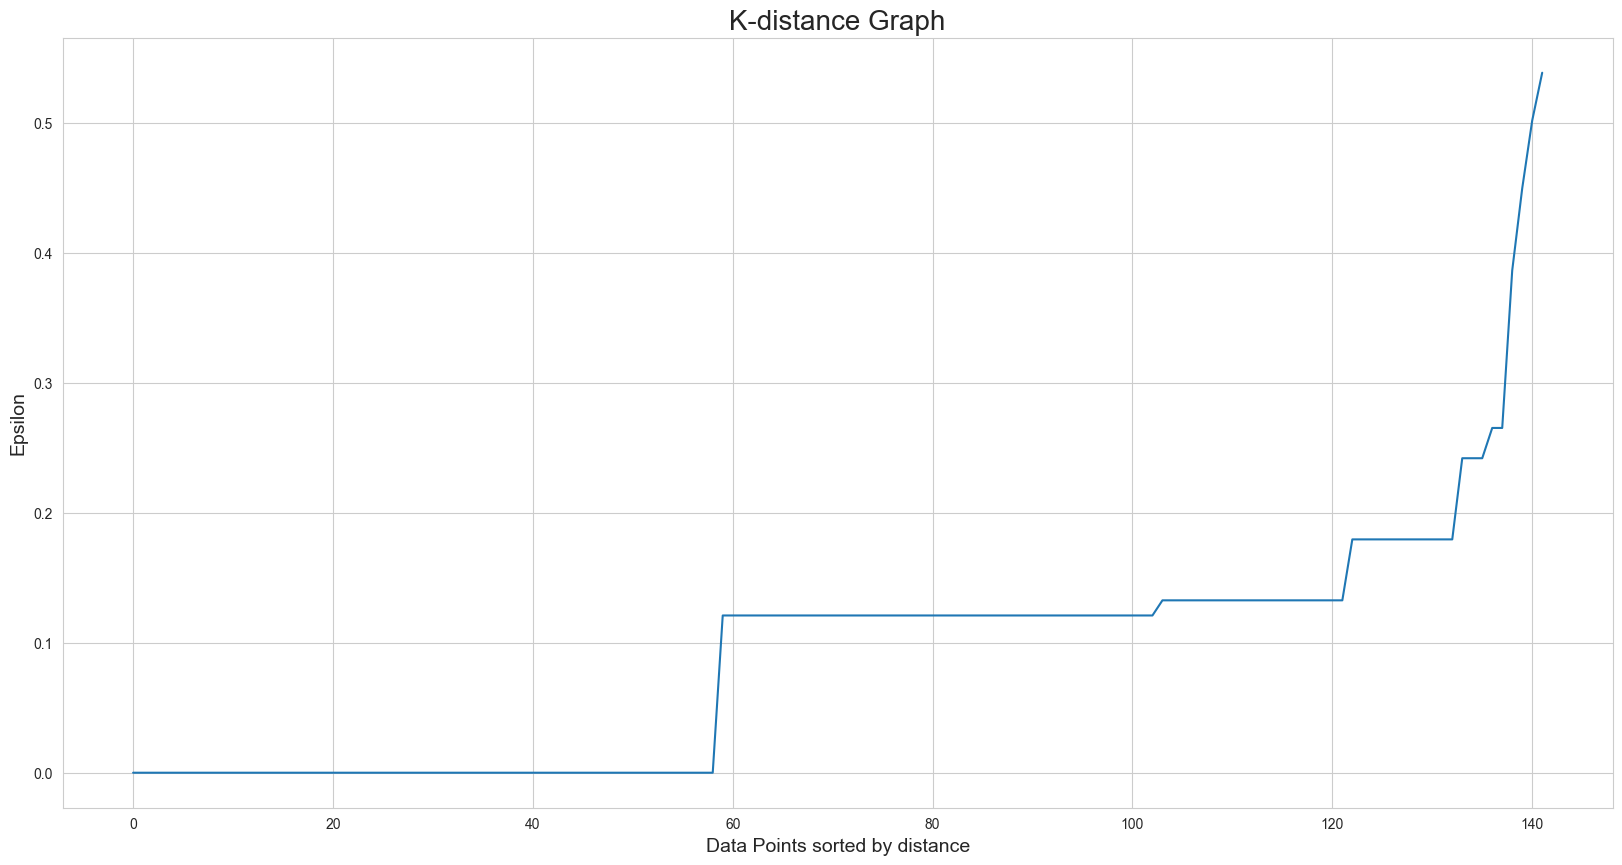

In [62]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()